__Hotel Booking__ - Notebook to perform EDA on hotel booking data and build a model to predict cancellation of bookings



## 1. Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2. Loading dataset

In [2]:
df = pd.read_csv("hotel_booking.csv")

## 3. Data overview

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


36 Columns so we must check columns first.

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

Our objective is to predict cancellation so many factors should play a role.

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Let's first split our categorical and continous data into two different lists.

## 4. Data Cleaning

In [7]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [8]:
missing_percent(df)

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

Too many missing values for `company` lets just drop it.

In [9]:
df = df.drop("company",axis = 1)

Now let's deal with the `agent` column.

In [10]:
df["agent"].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
304.0        1
431.0        1
278.0        1
450.0        1
114.0        1
Name: agent, Length: 333, dtype: int64

So let's just replace the `NaN` with the last value of that column. and then convert it to `str` type.

In [11]:
df["agent"] = df["agent"].fillna(method='ffill')

Now just drop every other missing row.

In [12]:
df = df.dropna()

Now we're good to go. Let's just drop unrelated columns.

## 5. Dropping columns

In [13]:
df["credit_card"]

3         ************5677
4         ************5498
5         ************9263
6         ************6994
7         ************8729
                ...       
119385    ************8647
119386    ************4333
119387    ************1821
119388    ************7860
119389    ************4482
Name: credit_card, Length: 118895, dtype: object

For sure `credit_card` doesn't have any valuable information, dropped!

Same agrument goes for `email` and `name`. But what about `phone-number`? Could we extract something meaningful out of it? 

In [14]:
phone_code = df["phone-number"].apply(lambda p : p.split("-")[0])
phone_code.value_counts()

799    168
185    167
541    164
372    162
137    162
      ... 
973    105
896    105
577    105
818    101
970     97
Name: phone-number, Length: 900, dtype: int64

As we can see `phone_code` is something that might be useful in future. so we'll make a new columns and then drop the `phone-number`

In [15]:
df["phone_code"] = phone_code.astype("str")
df["agent"] = df["agent"].astype("str")

In [16]:
df = df.drop(["credit_card","email","phone-number","name"], axis = 1)

## 6. EDA

Since our main target is `is_canceled` let's jump into it. and then explore everything related.

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

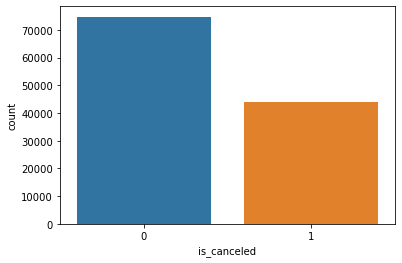

In [17]:
sns.countplot(df["is_canceled"])

* Canceling rate is pretty much high.
* 70000> not canceled Vs. 40000> canceled.

<AxesSubplot:xlabel='reservation_status', ylabel='count'>

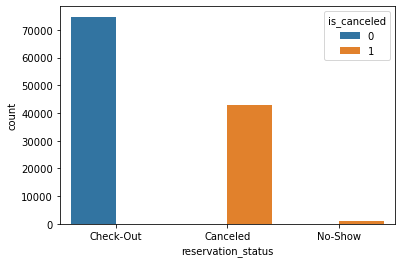

In [18]:
sns.countplot(df["reservation_status"], hue=df["is_canceled"])

As we can see we got a pretty cheat code. `reservation_status` is `is_canceled` + some `No-show`s so if we want to predict the canceling guests, it's necessary to remove this column.

(0.0, 500.0)

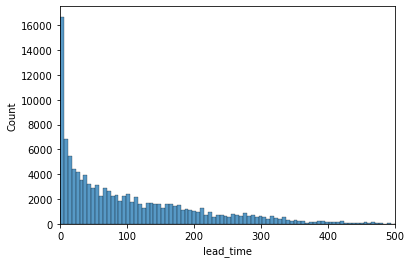

In [19]:
sns.histplot(df["lead_time"])
plt.xlim(0,500)

As we can see, in the `lead_time` we're dealing with an exponential distrubition!

Now let's compare the cancelings between two hotels.

<AxesSubplot:xlabel='hotel', ylabel='count'>

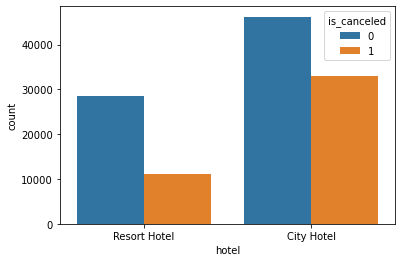

In [20]:
sns.countplot(df["hotel"], hue=df["is_canceled"])

Greater canceling rate for `City Hotel`. this could help us with our model.

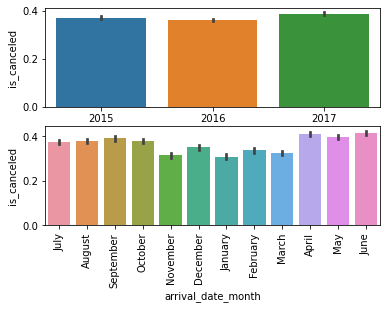

In [21]:
fig, ax =plt.subplots(2,1)
sns.barplot(x = df["arrival_date_year"], y = df["is_canceled"], ax = ax[0])
sns.barplot(x = df["arrival_date_month"], y = df["is_canceled"], ax = ax[1])
plt.xticks(rotation=90)
plt.show()

It almost shows that `arrival_date_year` and `arrival_date_month` don't play a heavy role here. So mayber we should less complexify our model and remove these columns

<AxesSubplot:xlabel='customer_type', ylabel='is_canceled'>

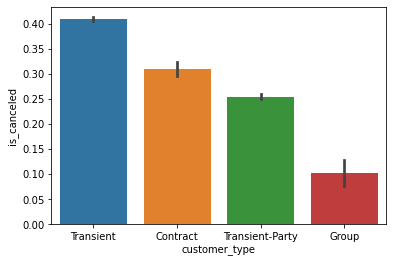

In [22]:
sns.barplot(x = df["customer_type"], y = df["is_canceled"])

We must definitely consider `customer_type` in our model. 

<AxesSubplot:xlabel='is_canceled', ylabel='previous_cancellations'>

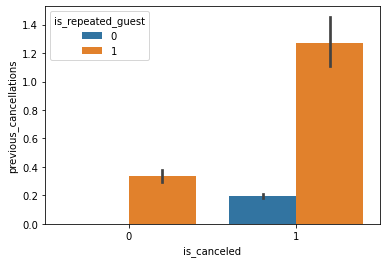

In [23]:
sns.barplot(x = df["is_canceled"], y = df["previous_cancellations"], hue = df["is_repeated_guest"])

* Customers with the history of cancellation tend to cancel more often.
* Interestingly repeated guests tend to cancel more!

<AxesSubplot:xlabel='is_canceled', ylabel='days_in_waiting_list'>

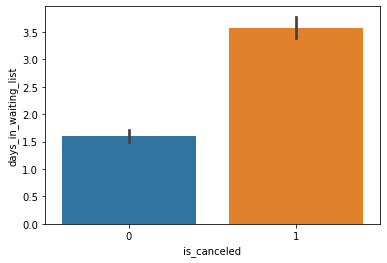

In [24]:
sns.barplot(x = df["is_canceled"], y = df["days_in_waiting_list"])

More days in waiting list, more chance of cancelling

<AxesSubplot:xlabel='deposit_type', ylabel='is_canceled'>

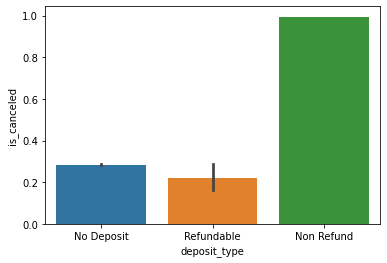

In [25]:
sns.barplot(y = df["is_canceled"], x = df["deposit_type"])

* Non Refundable payments tends to cancel more.
* No deposit and Refundable type are more or less the same.

In [26]:
month = pd.to_datetime(df["reservation_status_date"]).dt.month
year = pd.to_datetime(df["reservation_status_date"]).dt.year


<AxesSubplot:xlabel='reservation_status_date', ylabel='count'>

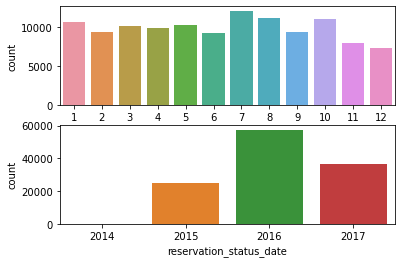

In [27]:
fig, ax =plt.subplots(2,1)
sns.countplot(month, ax = ax[0])
sns.countplot(year, ax = ax[1])

Extracted some useful insights from `reservation_status_date` and then created `month` and `year` lists.

With these lists, we can conclude that reservation status date plays a huge role whether a guest cancels or not.


 We can see as we get close to the end of the year, cancelations tend to decrease after a sudden rise in July. (which could be an account for the summer travels)

Likewise, cancelation varies with year.

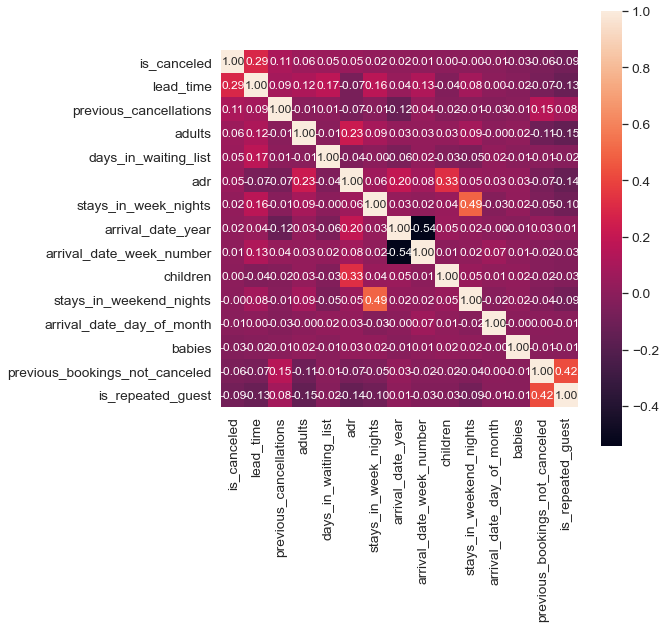

In [28]:
a = df.corr()
plt.figure(figsize=(8,8))
k = 15
cols = a.nlargest(k, 'is_canceled')['is_canceled'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [29]:
cor = (df.corr()**2)**0.5
cor_mat = cor["is_canceled"].sort_values(ascending=True)
cor_mat*100

stays_in_weekend_nights             0.264946
children                            0.474610
arrival_date_day_of_month           0.615946
arrival_date_week_number            0.746500
arrival_date_year                   1.638091
stays_in_week_nights                2.408820
babies                              3.252242
adr                                 4.617138
days_in_waiting_list                5.401352
previous_bookings_not_canceled      5.549528
adults                              5.837584
is_repeated_guest                   8.518345
previous_cancellations             10.992081
booking_changes                    14.462872
required_car_parking_spaces        19.480240
total_of_special_requests          23.566061
lead_time                          29.209315
is_canceled                       100.000000
Name: is_canceled, dtype: float64

Finally took the abs value of the cor matrix and then sorted it.

Dropped columns with cor < 3%.

## 7. Feature engineering

In [30]:
df.drop(['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list'], axis = 1, inplace=True)

Now we know what parameteres we're dealing with!

So it seems like `children` , `stays_in_weekend_nights` , `stays_in_week_nights` , `arrival_date_year`, `arrival_date_week_number`, `arrival_date_day_of_month` ,  `babies` don't contribute much to our model. 

In [31]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type', 'deposit_type',
       'agent', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date', 'phone_code'],
      dtype='object')

## 8. Feature Selection

First we split the data into categorical and numerical.

In [32]:
data = df.columns
catg = []
for i in data:
    if df[i].dtype == 'O':
        catg.append(i)
catg = df[catg]
catg

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,agent,customer_type,reservation_status_date,phone_code
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,304.0,Transient,2015-07-02,364
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,240.0,Transient,2015-07-03,713
5,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,240.0,Transient,2015-07-03,190
6,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,240.0,Transient,2015-07-03,420
7,Resort Hotel,July,FB,Direct,Direct,C,No Deposit,303.0,Transient,2015-07-03,286
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,394.0,Transient,2017-09-06,403
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,9.0,Transient,2017-09-07,238
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,9.0,Transient,2017-09-07,395
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,89.0,Transient,2017-09-07,531


In [33]:
num = df.drop(catg,axis = 1)
num = num.drop("is_canceled", axis = 1)
num

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests
3,13,27,1,0,1,1,0.0,0,0,0,0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,98.00,0,1
5,14,27,1,0,2,2,0.0,0,0,0,0,98.00,0,1
6,0,27,1,0,2,2,0.0,0,0,0,0,107.00,0,0
7,9,27,1,0,2,2,0.0,0,0,0,0,103.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,104.40,0,0


Normalized the numerical feautres for better performance.

In [34]:
num['lead_time'] = np.log(num['lead_time'] + 1)
num['arrival_date_week_number'] = np.log(num['arrival_date_week_number'] + 1)
num['arrival_date_day_of_month'] = np.log(num['arrival_date_day_of_month'] + 1)
num['adr'] = np.log(num['adr'] + 1)

With decision trees typically we don't use `one hot encoding` with many features, like the situation here. so instead of that we just go with label encoding.

For more information check this article: <a href="https://kiwidamien.github.io/are-you-getting-burned-by-one-hot-encoding.html"> Are You Getting Burned By One-Hot Encoding? <a/>

First of all let's extract some useful information from `reservation_status_date` and then encode the `catg`.

In [35]:
# Extracting reservation

catg["reservation_status_date"] = pd.to_datetime(catg["reservation_status_date"])

catg["year"] = catg["reservation_status_date"].dt.year
catg["month"] = catg["reservation_status_date"].dt.month
catg["day"] = catg["reservation_status_date"].dt.day

catg = catg.drop("reservation_status_date", axis = 1)

In [36]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

columns = catg.columns
for col in columns:
    catg[col] = label.fit_transform(catg[col])
catg

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,agent,customer_type,phone_code,year,month,day
3,1,5,0,2,0,0,0,156,2,264,1,6,1
4,1,5,0,6,3,0,0,102,2,613,1,6,2
5,1,5,0,6,3,0,0,102,2,90,1,6,2
6,1,5,0,3,1,2,0,102,2,320,1,6,2
7,1,5,1,3,1,2,0,155,2,186,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,5,3,0,0,216,2,303,3,8,5
119386,0,1,0,6,3,4,0,323,2,138,3,8,6
119387,0,1,0,6,3,3,0,323,2,295,3,8,6
119388,0,1,0,6,3,0,0,322,2,431,3,8,6


In [37]:
catg = catg.drop(["phone_code","agent"],axis =1)

In [38]:
X = catg.join(num).drop("adr",axis = 1)
y = df["is_canceled"]

## 9. Spliting features 

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

## 10. Creating the model

### 1. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     24607
           1       0.95      0.95      0.95     14629

    accuracy                           0.96     39236
   macro avg       0.96      0.96      0.96     39236
weighted avg       0.96      0.96      0.96     39236



__96% Accuracy with decision tree__

Now let's check with Grid Search whether we can perform better with hypertuning or not.

In [42]:
from sklearn.model_selection import GridSearchCV

param_dist = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,None]
}

grid = GridSearchCV(tree_model, param_grid=param_dist, cv = 10,n_jobs = -1)
grid.fit(X_train,y_train)
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [43]:
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=30)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     24607
           1       0.96      0.95      0.95     14629

    accuracy                           0.97     39236
   macro avg       0.96      0.96      0.96     39236
weighted avg       0.97      0.97      0.97     39236



__Got 97% Accuracy with `entropy` and `max_depth` of 30.__

Although we might have overfitted our model for only 1 percent.

### MinMax Scaling features for Logistic Regression

In [44]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### 2. Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegressionCV

log_model = LogisticRegressionCV(max_iter=1000)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86     24607
           1       0.96      0.47      0.63     14629

    accuracy                           0.79     39236
   macro avg       0.86      0.73      0.74     39236
weighted avg       0.83      0.79      0.77     39236



__79% Accuracy with Logistic Regression__

### Standar Scaling features for Logistic Regression

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
print(classification_report(y_test,y_pred))

__88% Accuracy with KNN__